In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf

2024-11-11 08:50:43.277542: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-11 08:50:43.287640: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 08:50:43.404906: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 08:50:43.405829: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True # dynamically grow the memory used on the GPU
config.log_device_placement = True # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping: no known devices.


2024-11-11 08:50:52.302417: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-11 08:50:52.308476: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
my_data_dir = 'dataset/cell_images'
os.listdir(my_data_dir)
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'
os.listdir(train_path)
print(len(os.listdir(train_path+'/uninfected/')))
print(len(os.listdir(train_path+'/parasitized/')))
para_img= imread(train_path+'/parasitized/'+ os.listdir(train_path+'/parasitized')[0])

12479
12479


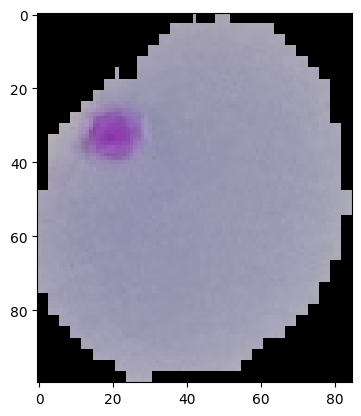

In [4]:
plt.imshow(para_img)

In [5]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
print(dim1)

[118, 136, 145, 142, 133, 118, 154, 163, 127, 106, 115, 118, 172, 127, 136, 115, 145, 127, 139, 124, 139, 130, 118, 154, 142, 97, 133, 139, 136, 118, 124, 163, 124, 115, 130, 118, 145, 145, 109, 118, 112, 124, 109, 148, 127, 115, 178, 130, 124, 160, 124, 142, 118, 136, 136, 139, 124, 127, 118, 151, 103, 139, 118, 112, 187, 130, 115, 136, 127, 160, 142, 121, 124, 130, 139, 133, 136, 127, 112, 127, 127, 160, 133, 136, 142, 136, 106, 118, 118, 127, 121, 145, 112, 106, 124, 148, 121, 136, 124, 160, 103, 136, 109, 121, 172, 145, 130, 88, 103, 115, 115, 124, 121, 130, 127, 145, 130, 130, 133, 130, 127, 106, 127, 124, 133, 169, 148, 151, 103, 154, 124, 109, 133, 154, 127, 148, 115, 145, 118, 127, 139, 121, 160, 142, 130, 118, 163, 97, 130, 154, 139, 148, 136, 136, 106, 121, 115, 118, 160, 121, 163, 124, 139, 136, 154, 151, 106, 142, 133, 172, 121, 124, 130, 133, 130, 139, 133, 166, 115, 142, 145, 115, 130, 154, 154, 163, 163, 133, 109, 130, 136, 109, 115, 133, 154, 124, 187, 148, 172, 121, 13

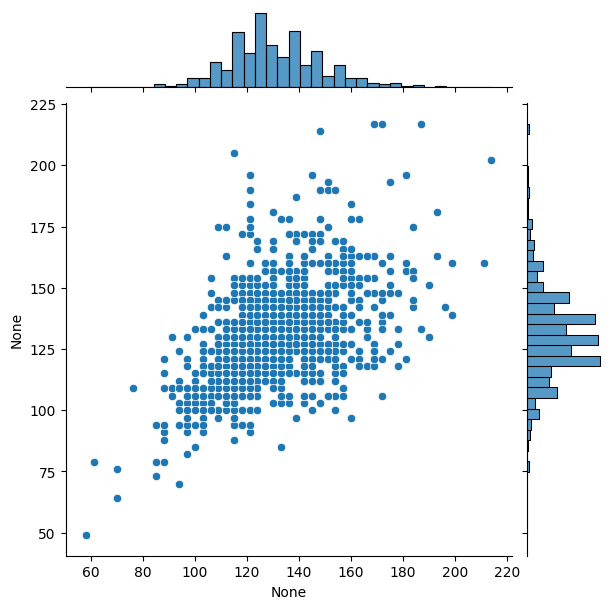

In [6]:
sns.jointplot(x=dim1,y=dim2)

In [7]:
image_shape = (130,130,3)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True,
                               fill_mode='nearest')

In [8]:
model = models.Sequential()
model.add(keras.Input(shape=(image_shape)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2024-11-11 08:51:14.086899: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-11 08:51:14.087070: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [10]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [11]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [12]:
results = model.fit(train_image_gen,epochs=4,validation_data=test_image_gen)

Epoch 1/4


2024-11-11 08:51:36.582581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1560/1560 [==============================] - ETA: 0s - loss: 0.3486 - accuracy: 0.8570

2024-11-11 08:59:14.110541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1560/1560 [==============================] - 489s 313ms/step - loss: 0.3486 - accuracy: 0.8570 - val_loss: 0.1902 - val_accuracy: 0.9358
Epoch 2/4
1560/1560 [==============================] - 482s 309ms/step - loss: 0.1839 - accuracy: 0.9447 - val_loss: 0.1697 - val_accuracy: 0.9415
Epoch 3/4
1560/1560 [==============================] - 441s 283ms/step - loss: 0.1730 - accuracy: 0.9479 - val_loss: 0.2059 - val_accuracy: 0.9412
Epoch 4/4
1560/1560 [==============================] - 334s 214ms/step - loss: 0.1712 - accuracy: 0.9484 - val_loss: 0.1591 - val_accuracy: 0.9465


In [13]:
model.save('cell_model.h5')

ROHIT JAIN D


<Axes: >

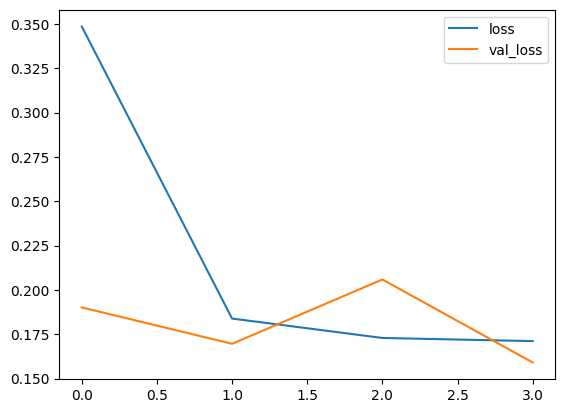

In [14]:
losses = pd.DataFrame(model.history.history)
print("ROHIT JAIN D")
losses[['loss','val_loss']].plot()

1/1 [==============================] - 0s 152ms/step
ROHIT JAIN D 212222230120


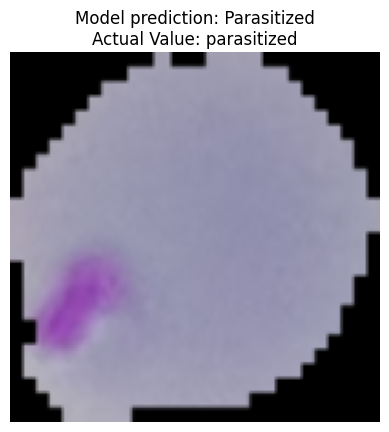

In [15]:
import random
import tensorflow as tf

list_dir=["UnInfected","parasitized"]
dir_=(list_dir[1])
para_img= imread(train_path+
                 '/'+dir_+'/'+
                 os.listdir(train_path+'/'+dir_)[random.randint(0,100)])
img  = tf.convert_to_tensor(np.asarray(para_img))
img = tf.image.resize(img,(130,130))
img=img.numpy()
pred=bool(model.predict(img.reshape(1,130,130,3))<0.5 )
plt.title("Model prediction: "+("Parasitized" if pred
    else "Un Infected")+"\nActual Value: "+str(dir_))
plt.axis("off")
print("ROHIT JAIN D 212222230120")
plt.imshow(img)
plt.show()

In [16]:
model.evaluate(test_image_gen)
pred_probabilities = model.predict(test_image_gen)
test_image_gen.classes
predictions = pred_probabilities > 0.5
print("ROHIT JAIN D 212222230120")
print(classification_report(test_image_gen.classes,predictions))
confusion_matrix(test_image_gen.classes,predictions)

  1/163 [..............................] - ETA: 27s - loss: 0.0179 - accuracy: 1.0000

2024-11-11 09:22:42.805499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


  1/163 [..............................] - ETA: 30s

2024-11-11 09:23:03.402852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 13s 77ms/step
ROHIT JAIN D 212222230120
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.93      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



array([[1213,   87],
       [  52, 1248]])